# Classification
--------------

In [70]:
# Importing necessary libraries:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline
sns.set(color_codes = True)

In [71]:
# Loading dataset:
data = pd.read_csv("income.csv")

In [72]:
data

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income >50K
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


<AxesSubplot:xlabel='income >50K', ylabel='count'>

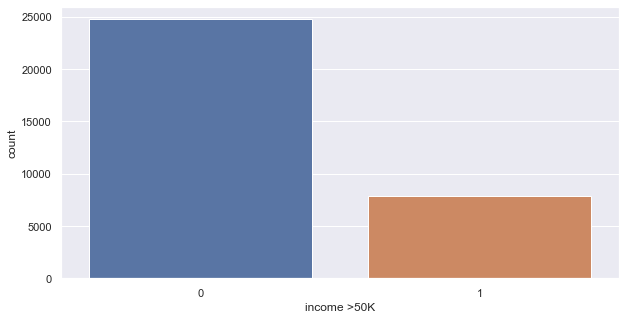

In [73]:
plt.figure(figsize = (10, 5))
sns.countplot(x = "income >50K", data = data)

In [74]:
data.isnull().sum()

age                  0
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income >50K          0
dtype: int64

In [75]:
data = data.drop(["workclass", "occupation", "native-country"], axis = 1)

In [76]:
data

,age,education,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income >50K
0,39,Bachelors,13,Never-married,Not-in-family,White,Male,2174,0,40,0
1,50,Bachelors,13,Married-civ-spouse,Husband,White,Male,0,0,13,0
2,38,HS-grad,9,Divorced,Not-in-family,White,Male,0,0,40,0
3,53,11th,7,Married-civ-spouse,Husband,Black,Male,0,0,40,0
4,28,Bachelors,13,Married-civ-spouse,Wife,Black,Female,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Assoc-acdm,12,Married-civ-spouse,Wife,White,Female,0,0,38,0
32557,40,HS-grad,9,Married-civ-spouse,Husband,White,Male,0,0,40,1
32558,58,HS-grad,9,Widowed,Unmarried,White,Female,0,0,40,0
32559,22,HS-grad,9,Never-married,Own-child,White,Male,0,0,20,0


In [77]:
data.isnull().sum()

age               0
education         0
education-num     0
marital-status    0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
income >50K       0
dtype: int64

<AxesSubplot:xlabel='education', ylabel='count'>

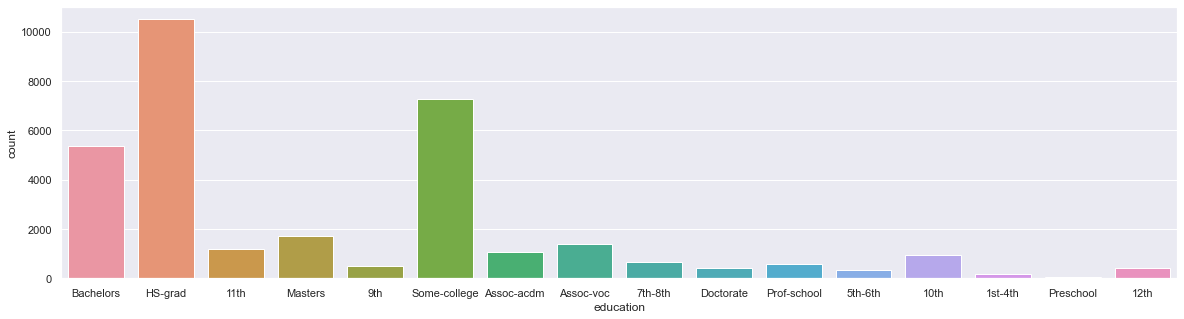

In [78]:
plt.figure(figsize = (20, 5))
sns.countplot(x = "education", data = data)

<AxesSubplot:xlabel='marital-status', ylabel='count'>

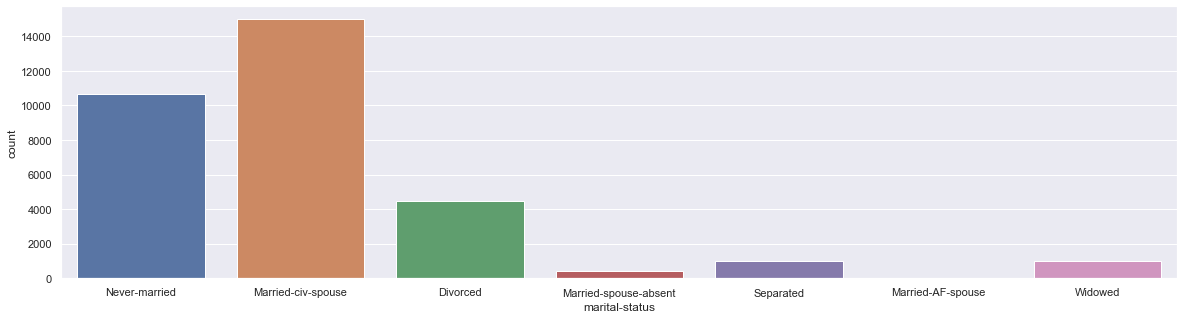

In [79]:
plt.figure(figsize = (20, 5))
sns.countplot(x = "marital-status", data = data)

<AxesSubplot:xlabel='relationship', ylabel='count'>

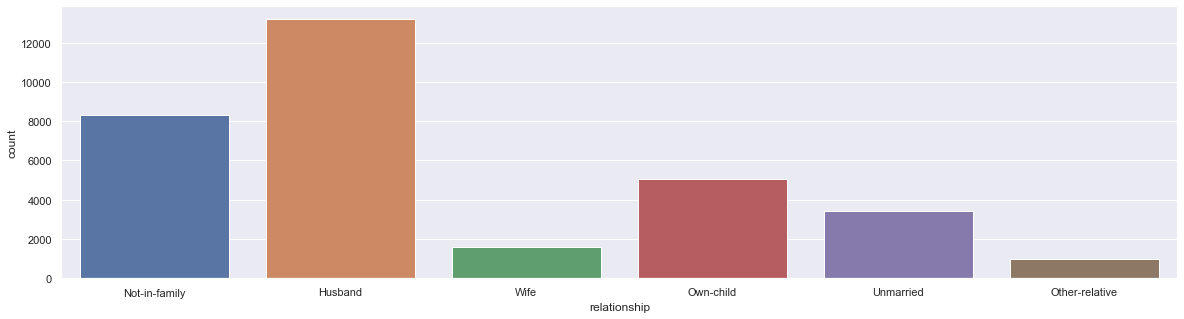

In [80]:
plt.figure(figsize = (20, 5))
sns.countplot(x = "relationship", data = data)

In [81]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [82]:
le = LabelEncoder()

In [83]:
data.iloc[:, [5]] = le.fit_transform(data.iloc[:, [5]].values.ravel())
data.iloc[:, [6]] = le.fit_transform(data.iloc[:, [6]].values.ravel())

In [84]:
data

,age,education,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income >50K
0,39,Bachelors,13,Never-married,Not-in-family,4,1,2174,0,40,0
1,50,Bachelors,13,Married-civ-spouse,Husband,4,1,0,0,13,0
2,38,HS-grad,9,Divorced,Not-in-family,4,1,0,0,40,0
3,53,11th,7,Married-civ-spouse,Husband,2,1,0,0,40,0
4,28,Bachelors,13,Married-civ-spouse,Wife,2,0,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Assoc-acdm,12,Married-civ-spouse,Wife,4,0,0,0,38,0
32557,40,HS-grad,9,Married-civ-spouse,Husband,4,1,0,0,40,1
32558,58,HS-grad,9,Widowed,Unmarried,4,0,0,0,40,0
32559,22,HS-grad,9,Never-married,Own-child,4,1,0,0,20,0


In [85]:
data = data[:].values

In [86]:
data = pd.DataFrame(data)

In [87]:
data

,0,1,2,3,4,5,6,7,8,9,10
0,39,Bachelors,13,Never-married,Not-in-family,4,1,2174,0,40,0
1,50,Bachelors,13,Married-civ-spouse,Husband,4,1,0,0,13,0
2,38,HS-grad,9,Divorced,Not-in-family,4,1,0,0,40,0
3,53,11th,7,Married-civ-spouse,Husband,2,1,0,0,40,0
4,28,Bachelors,13,Married-civ-spouse,Wife,2,0,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Assoc-acdm,12,Married-civ-spouse,Wife,4,0,0,0,38,0
32557,40,HS-grad,9,Married-civ-spouse,Husband,4,1,0,0,40,1
32558,58,HS-grad,9,Widowed,Unmarried,4,0,0,0,40,0
32559,22,HS-grad,9,Never-married,Own-child,4,1,0,0,20,0


In [88]:
data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

In [89]:
ohe = OneHotEncoder()

In [90]:
ct = ColumnTransformer([("data", ohe, [1, 3, 4])], remainder = "passthrough")

In [91]:
data = ct.fit_transform(data)

In [92]:
data = pd.DataFrame(data.toarray())

In [98]:
data

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,39.0,13.0,4.0,1.0,2174.0,0.0,40.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,50.0,13.0,4.0,1.0,0.0,0.0,13.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,38.0,9.0,4.0,1.0,0.0,0.0,40.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,53.0,7.0,2.0,1.0,0.0,0.0,40.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,28.0,13.0,2.0,0.0,0.0,0.0,40.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,27.0,12.0,4.0,0.0,0.0,0.0,38.0,0.0
32557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,40.0,9.0,4.0,1.0,0.0,0.0,40.0,1.0
32558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,58.0,9.0,4.0,0.0,0.0,0.0,40.0,0.0
32559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,22.0,9.0,4.0,1.0,0.0,0.0,20.0,0.0


In [162]:
from sklearn.preprocessing import MaxAbsScaler

In [163]:
mas = MaxAbsScaler()

In [164]:
data.iloc[:, :-1] = mas.fit_transform(data.iloc[:, :-1])

In [165]:
data

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.550551,0.834334,1.00000,1.0,0.922923,0.0,0.472472,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.792292,0.834334,1.00000,1.0,0.000000,0.0,0.028886,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.525025,0.291792,1.00000,1.0,0.000000,0.0,0.472472,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.841341,0.099600,0.08959,1.0,0.000000,0.0,0.472472,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.259760,0.834334,0.08959,0.0,0.000000,0.0,0.472472,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.233734,0.735736,1.00000,0.0,0.000000,0.0,0.229730,0.0
32557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.575075,0.291792,1.00000,1.0,0.000000,0.0,0.472472,1.0
32558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.901902,0.291792,1.00000,0.0,0.000000,0.0,0.472472,0.0
32559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.108108,0.291792,1.00000,1.0,0.000000,0.0,0.071071,0.0


In [166]:
from sklearn.model_selection import train_test_split

In [167]:
train_data, test_data, train_labels, test_labels = train_test_split(data.iloc[:, :-1], 
                                                                    data.iloc[:, -1:], 
                                                                    test_size = 1/3, 
                                                                    random_state = 52)

In [168]:
train_data.shape

(21707, 36)

In [169]:
test_data.shape

(10854, 36)

--------------

## Logistic Regression
---------

In [170]:
from sklearn.linear_model import LogisticRegression

In [171]:
print("Loading...")

for x in ["l2", "none"]:
    for y in ["newton-cg", "lbfgs", "sag", "saga"]:
        for i in [50, 75, 100, 125, 150]:
                
            lr = LogisticRegression(penalty = x, 
                                    solver = y, 
                                    max_iter = i)
                
            lr_ = lr.fit(train_data.values, train_labels.values.ravel())
            y_pred = lr_.predict(test_data.values)
                
            from sklearn.metrics import accuracy_score
                
            ac = accuracy_score(y_pred = y_pred, y_true = test_labels)
                
            if ac * 100 > 80:
                
                print("ACCURACY: {}, penalty: {}, solver: {}, max_iter: {}".format(ac * 100, x, y, i))

Loading...
ACCURACY: 83.46231803943247, penalty: l2, solver: newton-cg, max_iter: 50
ACCURACY: 83.46231803943247, penalty: l2, solver: newton-cg, max_iter: 75
ACCURACY: 83.46231803943247, penalty: l2, solver: newton-cg, max_iter: 100
ACCURACY: 83.46231803943247, penalty: l2, solver: newton-cg, max_iter: 125
ACCURACY: 83.46231803943247, penalty: l2, solver: newton-cg, max_iter: 150


C:\Users\90545\anaconda3\envs\data science\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ACCURACY: 83.45310484613967, penalty: l2, solver: lbfgs, max_iter: 50


C:\Users\90545\anaconda3\envs\data science\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ACCURACY: 83.46231803943247, penalty: l2, solver: lbfgs, max_iter: 75


C:\Users\90545\anaconda3\envs\data science\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ACCURACY: 83.47153123272525, penalty: l2, solver: lbfgs, max_iter: 100


C:\Users\90545\anaconda3\envs\data science\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ACCURACY: 83.46231803943247, penalty: l2, solver: lbfgs, max_iter: 125


C:\Users\90545\anaconda3\envs\data science\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ACCURACY: 83.46231803943247, penalty: l2, solver: lbfgs, max_iter: 150
ACCURACY: 83.46231803943247, penalty: l2, solver: sag, max_iter: 50
ACCURACY: 83.46231803943247, penalty: l2, solver: sag, max_iter: 75
ACCURACY: 83.46231803943247, penalty: l2, solver: sag, max_iter: 100
ACCURACY: 83.46231803943247, penalty: l2, solver: sag, max_iter: 125
ACCURACY: 83.46231803943247, penalty: l2, solver: sag, max_iter: 150


C:\Users\90545\anaconda3\envs\data science\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


ACCURACY: 83.46231803943247, penalty: l2, solver: saga, max_iter: 50
ACCURACY: 83.46231803943247, penalty: l2, solver: saga, max_iter: 75
ACCURACY: 83.46231803943247, penalty: l2, solver: saga, max_iter: 100
ACCURACY: 83.46231803943247, penalty: l2, solver: saga, max_iter: 125
ACCURACY: 83.46231803943247, penalty: l2, solver: saga, max_iter: 150
ACCURACY: 83.42546526626128, penalty: none, solver: newton-cg, max_iter: 50
ACCURACY: 83.42546526626128, penalty: none, solver: newton-cg, max_iter: 75
ACCURACY: 83.42546526626128, penalty: none, solver: newton-cg, max_iter: 100
ACCURACY: 83.42546526626128, penalty: none, solver: newton-cg, max_iter: 125
ACCURACY: 83.42546526626128, penalty: none, solver: newton-cg, max_iter: 150


C:\Users\90545\anaconda3\envs\data science\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ACCURACY: 83.4070388796757, penalty: none, solver: lbfgs, max_iter: 50


C:\Users\90545\anaconda3\envs\data science\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ACCURACY: 83.43467845955408, penalty: none, solver: lbfgs, max_iter: 75


C:\Users\90545\anaconda3\envs\data science\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ACCURACY: 83.41625207296849, penalty: none, solver: lbfgs, max_iter: 100


C:\Users\90545\anaconda3\envs\data science\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ACCURACY: 83.42546526626128, penalty: none, solver: lbfgs, max_iter: 125


C:\Users\90545\anaconda3\envs\data science\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ACCURACY: 83.44389165284689, penalty: none, solver: lbfgs, max_iter: 150


C:\Users\90545\anaconda3\envs\data science\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


ACCURACY: 83.42546526626128, penalty: none, solver: sag, max_iter: 50


C:\Users\90545\anaconda3\envs\data science\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


ACCURACY: 83.42546526626128, penalty: none, solver: sag, max_iter: 75


C:\Users\90545\anaconda3\envs\data science\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


ACCURACY: 83.42546526626128, penalty: none, solver: sag, max_iter: 100


C:\Users\90545\anaconda3\envs\data science\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


ACCURACY: 83.42546526626128, penalty: none, solver: sag, max_iter: 125


C:\Users\90545\anaconda3\envs\data science\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


ACCURACY: 83.42546526626128, penalty: none, solver: sag, max_iter: 150


C:\Users\90545\anaconda3\envs\data science\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


ACCURACY: 83.42546526626128, penalty: none, solver: saga, max_iter: 50


C:\Users\90545\anaconda3\envs\data science\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


ACCURACY: 83.42546526626128, penalty: none, solver: saga, max_iter: 75


C:\Users\90545\anaconda3\envs\data science\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


ACCURACY: 83.42546526626128, penalty: none, solver: saga, max_iter: 100


C:\Users\90545\anaconda3\envs\data science\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


ACCURACY: 83.42546526626128, penalty: none, solver: saga, max_iter: 125
ACCURACY: 83.42546526626128, penalty: none, solver: saga, max_iter: 150


C:\Users\90545\anaconda3\envs\data science\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


*************

## KNN
--------------

In [172]:
from sklearn.neighbors import KNeighborsClassifier

In [173]:
print("Loading...")

for x in range(3, 21):
    for y in ["uniform", "distance"]:
                
        knn = KNeighborsClassifier(n_neighbors = x, 
                                    weights = y)
                
        fit_ = knn.fit(train_data, train_labels.values.ravel())
        y_pred = fit_.predict(test_data)
                
        from sklearn.metrics import accuracy_score
                
        ac = accuracy_score(y_true = test_labels, y_pred = y_pred)
                
        if ac * 100 > 80:
                
            print("ACCURACY: {}, n_neighbors: {}, weights: {}".format(ac * 100, x, y))

Loading...
ACCURACY: 80.74442601805785, n_neighbors: 3, weights: uniform
ACCURACY: 80.32983231988207, n_neighbors: 3, weights: distance
ACCURACY: 81.92371475953566, n_neighbors: 4, weights: uniform
ACCURACY: 81.11295374976967, n_neighbors: 4, weights: distance
ACCURACY: 82.16325778514833, n_neighbors: 5, weights: uniform
ACCURACY: 81.30643080891838, n_neighbors: 5, weights: distance
ACCURACY: 82.53178551686014, n_neighbors: 6, weights: uniform
ACCURACY: 81.71181131380136, n_neighbors: 6, weights: distance
ACCURACY: 82.26460291136908, n_neighbors: 7, weights: uniform
ACCURACY: 81.59203980099502, n_neighbors: 7, weights: distance
ACCURACY: 82.48571955039617, n_neighbors: 8, weights: uniform
ACCURACY: 81.89607517965727, n_neighbors: 8, weights: distance
ACCURACY: 82.39358761746821, n_neighbors: 9, weights: uniform
ACCURACY: 81.81315644002211, n_neighbors: 9, weights: distance
ACCURACY: 82.74368896259443, n_neighbors: 10, weights: uniform
ACCURACY: 82.13561820526995, n_neighbors: 10, weigh

-----------

## SVC 
----

In [175]:
from sklearn.svm import SVC

In [176]:
print("Loading...")

for x in range(1, 5):
    for y in ["linear", "poly", "rbf", "sigmoid"]:
        for i in ["scale", "auto"]:
            
            if y == "poly":
                
                svc = SVC(kernel = y, degree = x, gamma = i)
                fit_ = svc.fit(train_data, train_labels.values.ravel())
                y_pred = fit_.predict(test_data)

                from sklearn.metrics import accuracy_score

                ac = accuracy_score(y_true = test_labels, y_pred = y_pred)

                if ac * 100 > 80:

                    print("ACCURACY: {}, kernel: {}, degree: {}, gamma: {}".format(ac * 100, y, x, i))
                    
            else:
                
                svc = SVC(kernel = y, gamma = i)
                fit_ = svc.fit(train_data, train_labels.values.ravel())
                y_pred = fit_.predict(test_data)

                from sklearn.metrics import accuracy_score

                ac = accuracy_score(y_true = test_labels, y_pred = y_pred)

                if ac * 100 > 80:

                    print("ACCURACY: {}, kernel: {}, gamma: {}".format(ac * 100, y, i))

Loading...
ACCURACY: 82.7989681223512, kernel: linear, gamma: scale
ACCURACY: 82.7989681223512, kernel: linear, gamma: auto
ACCURACY: 82.72526257600884, kernel: poly, degree: 1, gamma: scale
ACCURACY: 82.68840980283765, kernel: poly, degree: 1, gamma: auto
ACCURACY: 83.06615072784227, kernel: rbf, gamma: scale
ACCURACY: 82.7989681223512, kernel: rbf, gamma: auto
ACCURACY: 82.68840980283765, kernel: sigmoid, gamma: auto
ACCURACY: 82.7989681223512, kernel: linear, gamma: scale
ACCURACY: 82.7989681223512, kernel: linear, gamma: auto
ACCURACY: 83.08457711442786, kernel: poly, degree: 2, gamma: scale
ACCURACY: 82.76211534918002, kernel: poly, degree: 2, gamma: auto
ACCURACY: 83.06615072784227, kernel: rbf, gamma: scale
ACCURACY: 82.7989681223512, kernel: rbf, gamma: auto
ACCURACY: 82.68840980283765, kernel: sigmoid, gamma: auto
ACCURACY: 82.7989681223512, kernel: linear, gamma: scale
ACCURACY: 82.7989681223512, kernel: linear, gamma: auto
ACCURACY: 83.08457711442786, kernel: poly, degree: 3

--------------

## Naive Bayes
-----------

In [177]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB

In [181]:
gnb = GaussianNB()
mnb = MultinomialNB()
cnb = ComplementNB()
bnb = BernoulliNB()

In [189]:
print("Loading...")

for i in (gnb, mnb, cnb, bnb):
    
    fit_ = i.fit(train_data, train_labels.values.ravel())
    y_pred = fit_.predict(test_data)

    from sklearn.metrics import accuracy_score

    ac = accuracy_score(y_true = test_labels, y_pred = y_pred)

    if ac * 100 > 50:
        print("ACCURACY: {}, Algorithm: {}".format(ac * 100, i))
    else:
        print("None")

Loading...
ACCURACY: 66.7772249861802, Algorithm: GaussianNB()
ACCURACY: 78.5240464344942, Algorithm: MultinomialNB()
ACCURACY: 74.23069836005159, Algorithm: ComplementNB()
ACCURACY: 72.32356734844298, Algorithm: BernoulliNB()


------------

## Decision Tree
-----------

In [190]:
from sklearn.tree import DecisionTreeClassifier

In [195]:
print("Loading...")

for x in ["gini", "entropy"]:
    for y in ["best", "random"]:
        for i in [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]:
                
            tree = DecisionTreeClassifier(criterion = x, 
                                          splitter = y, 
                                          max_depth = i)
                
            lr_ = tree.fit(train_data.values, train_labels.values.ravel())
            y_pred = lr_.predict(test_data.values)
                
            from sklearn.metrics import accuracy_score
                
            ac = accuracy_score(y_pred = y_pred, y_true = test_labels)
                
            if ac * 100 > 85.5:
                
                print("ACCURACY: {}, criterion: {}, splitter: {}, max_depth: {}".format(ac * 100, x, y, i))

Loading...
ACCURACY: 85.5444997236042, criterion: gini, splitter: best, max_depth: 8
ACCURACY: 85.56292611018979, criterion: gini, splitter: best, max_depth: 9
ACCURACY: 85.553712916897, criterion: gini, splitter: best, max_depth: 10
ACCURACY: 85.51686014372581, criterion: gini, splitter: best, max_depth: 11


----------

## Random Forest
---------

In [196]:
from sklearn.ensemble import RandomForestClassifier

In [201]:
print("Loading...")

for x in range(50, 201, 10):
    for y in ["gini", "entropy"]:
        for i in [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]:
                
            tree = RandomForestClassifier(n_estimators = x, 
                                          criterion = y, 
                                          max_depth = i)
                
            lr_ = tree.fit(train_data.values, train_labels.values.ravel())
            y_pred = lr_.predict(test_data.values)
                
            from sklearn.metrics import accuracy_score
                
            ac = accuracy_score(y_pred = y_pred, y_true = test_labels)
                
            if ac * 100 > 85.5:
                
                print("ACCURACY: {}, n_estimator: {}, criterion: {}, max_depth: {}".format(ac * 100, x, y, i))

Loading...
ACCURACY: 85.57213930348259, n_estimator: 50, criterion: gini, max_depth: 12
ACCURACY: 85.65505804311775, n_estimator: 50, criterion: gini, max_depth: 13
ACCURACY: 85.58135249677538, n_estimator: 50, criterion: gini, max_depth: 14
ACCURACY: 85.67348442970334, n_estimator: 50, criterion: gini, max_depth: 15
ACCURACY: 85.52607333701862, n_estimator: 50, criterion: gini, max_depth: 16
ACCURACY: 85.57213930348259, n_estimator: 50, criterion: entropy, max_depth: 11
ACCURACY: 85.58135249677538, n_estimator: 50, criterion: entropy, max_depth: 12
ACCURACY: 85.51686014372581, n_estimator: 50, criterion: entropy, max_depth: 13
ACCURACY: 85.60899207665376, n_estimator: 50, criterion: entropy, max_depth: 14
ACCURACY: 85.58135249677538, n_estimator: 50, criterion: entropy, max_depth: 15
ACCURACY: 85.51686014372581, n_estimator: 60, criterion: gini, max_depth: 11
ACCURACY: 85.52607333701862, n_estimator: 60, criterion: gini, max_depth: 12
ACCURACY: 85.5444997236042, n_estimator: 60, crite

ACCURACY: 85.50764695043303, n_estimator: 160, criterion: gini, max_depth: 10
ACCURACY: 85.50764695043303, n_estimator: 160, criterion: gini, max_depth: 12
ACCURACY: 85.57213930348259, n_estimator: 160, criterion: gini, max_depth: 13
ACCURACY: 85.67348442970334, n_estimator: 160, criterion: gini, max_depth: 14
ACCURACY: 85.59977888336098, n_estimator: 160, criterion: gini, max_depth: 15
ACCURACY: 85.51686014372581, n_estimator: 160, criterion: gini, max_depth: 16
ACCURACY: 85.51686014372581, n_estimator: 160, criterion: entropy, max_depth: 11
ACCURACY: 85.59977888336098, n_estimator: 160, criterion: entropy, max_depth: 12
ACCURACY: 85.53528653031141, n_estimator: 160, criterion: entropy, max_depth: 14
ACCURACY: 85.52607333701862, n_estimator: 160, criterion: entropy, max_depth: 16
ACCURACY: 85.57213930348259, n_estimator: 170, criterion: gini, max_depth: 11
ACCURACY: 85.553712916897, n_estimator: 170, criterion: gini, max_depth: 12
ACCURACY: 85.56292611018979, n_estimator: 170, criteri

----------

## Extra Trees
-----

In [204]:
from sklearn.ensemble import ExtraTreesClassifier

In [205]:
print("Loading...")

for x in range(5, 60, 15):
    for y in [range(1, 16)]:
        for i in [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]:
                
            tree = ExtraTreesClassifier(n_estimators = x, 
                                        min_samples_split = y, 
                                        max_depth = i)
                
            lr_ = tree.fit(train_data.values, train_labels.values.ravel())
            y_pred = lr_.predict(test_data.values)
                
            from sklearn.metrics import accuracy_score
                
            ac = accuracy_score(y_pred = y_pred, y_true = test_labels)
                
            if ac * 100 > 85.5:
                print("ACCURACY: {}, n_estimator: {}, min_samples_split: {}, max_depth: {}".format(ac * 100, x, y, i))
            else:
                print("None")

Loading...


TypeError: '<' not supported between instances of 'float' and 'range'

----------

## AdaBoost
------

In [208]:
from sklearn.ensemble import AdaBoostClassifier

In [213]:
print("Loading...")

for x in range(10, 100, 10):
        for i in [0.5, 1., 1.5, 2., 2.5]:
                
            tree = AdaBoostClassifier(n_estimators = x, 
                                        learning_rate = i)
                
            lr_ = tree.fit(train_data.values, train_labels.values.ravel())
            y_pred = lr_.predict(test_data.values)
                
            from sklearn.metrics import accuracy_score
                
            ac = accuracy_score(y_pred = y_pred, y_true = test_labels)
                
            if ac * 100 > 85:
                print("ACCURACY: {}, n_estimator: {}, learning_rate: {}".format(ac * 100, x, i))
            else:
                pass

Loading...
ACCURACY: 85.07462686567165, n_estimator: 40, learning_rate: 1.0
ACCURACY: 85.42472821079787, n_estimator: 40, learning_rate: 1.5
ACCURACY: 85.33259627786991, n_estimator: 50, learning_rate: 1.0
ACCURACY: 85.58135249677538, n_estimator: 50, learning_rate: 1.5
ACCURACY: 85.10226644555003, n_estimator: 60, learning_rate: 0.5
ACCURACY: 85.3510226644555, n_estimator: 60, learning_rate: 1.0
ACCURACY: 85.64584484982495, n_estimator: 60, learning_rate: 1.5
ACCURACY: 85.22203795835637, n_estimator: 70, learning_rate: 0.5
ACCURACY: 85.3510226644555, n_estimator: 70, learning_rate: 1.0
ACCURACY: 85.76561636263129, n_estimator: 70, learning_rate: 1.5
ACCURACY: 85.20361157177078, n_estimator: 80, learning_rate: 0.5
ACCURACY: 85.3602358577483, n_estimator: 80, learning_rate: 1.0
ACCURACY: 85.85774829555925, n_estimator: 80, learning_rate: 1.5
ACCURACY: 85.18518518518519, n_estimator: 90, learning_rate: 0.5
ACCURACY: 85.45236779067625, n_estimator: 90, learning_rate: 1.0
ACCURACY: 85.7656

---------------

## Gradient Boosting
-----------

In [214]:
from sklearn.ensemble import GradientBoostingClassifier

In [218]:
print("Loading...")

for x in range(50, 100, 10):
    for y in [0.5, 1, 1.5, 2]:
        for i in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
                
            tree = GradientBoostingClassifier(n_estimators = x, 
                                              learning_rate = y,
                                              max_depth = i)
                
            lr_ = tree.fit(train_data.values, train_labels.values.ravel())
            y_pred = lr_.predict(test_data.values)
                
            from sklearn.metrics import accuracy_score
                
            ac = accuracy_score(y_pred = y_pred, y_true = test_labels)
                
            if ac * 100 > 85.5:
                print("ACCURACY: {}, n_estimator: {}, learing_rate: {}, max_depth: {}".format(ac * 100, x, y, i))
            else:
                pass

Loading...
ACCURACY: 85.85774829555925, n_estimator: 50, learing_rate: 0.5, max_depth: 2
ACCURACY: 86.06043854800075, n_estimator: 50, learing_rate: 0.5, max_depth: 3
ACCURACY: 85.81168232909526, n_estimator: 50, learing_rate: 0.5, max_depth: 4
ACCURACY: 86.1433572876359, n_estimator: 50, learing_rate: 1, max_depth: 2
ACCURACY: 85.71033720287453, n_estimator: 50, learing_rate: 1, max_depth: 3
ACCURACY: 86.06965174129353, n_estimator: 60, learing_rate: 0.5, max_depth: 2
ACCURACY: 85.95909342177998, n_estimator: 60, learing_rate: 0.5, max_depth: 3
ACCURACY: 85.65505804311775, n_estimator: 60, learing_rate: 0.5, max_depth: 4
ACCURACY: 85.9314538419016, n_estimator: 60, learing_rate: 1, max_depth: 2
ACCURACY: 85.7471899760457, n_estimator: 60, learing_rate: 1, max_depth: 3
ACCURACY: 85.96830661507279, n_estimator: 70, learing_rate: 0.5, max_depth: 2
ACCURACY: 85.98673300165838, n_estimator: 70, learing_rate: 0.5, max_depth: 3
ACCURACY: 85.66427123641054, n_estimator: 70, learing_rate: 0.5,

-----------------

## XGBoost
----------

In [219]:
from xgboost import XGBClassifier

In [221]:
xgboost = XGBClassifier()
xgboost.fit(train_data, train_labels)
y_pred = xgboost.predict(test_data)

from sklearn.metrics import accuracy_score

ac = accuracy_score(y_true = test_labels, y_pred = y_pred)

if ac * 100 > 85:
    print("ACCURACY: {}".format(ac * 100))
else:
    print("None")

[00:40:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
ACCURACY: 86.10650451446472
